`firefly/ntbks/settings_tutorial.ipynb`

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import YouTubeVideo

A recording of this jupyter notebook in action is available at:

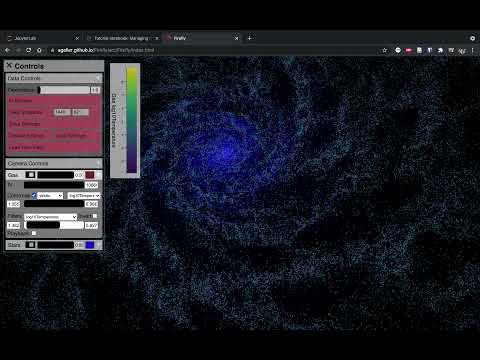

In [2]:
YouTubeVideo("Xt1vce_2DYo")

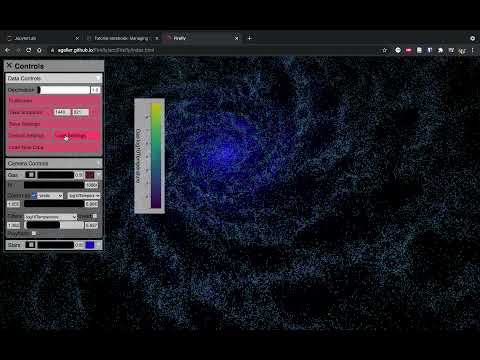

In [3]:
YouTubeVideo("ft0Y3XNJhl4")

In [4]:
import sys
import os
import numpy as np
from firefly.data_reader import ParticleGroup,Settings,ArrayReader

# Tutorial notebook: Managing Custom Settings
One of the core features of Firefly is the ability to customize the user interface (UI) and the startup behavior to make bespoke iterations of Firefly using ones own data. We have organized the different options that one can customize into different settings groups that fall into two categories: those that affect the app as a whole and those that are particular to an individual group of particles.

**App Settings** |     |**Particle Group Settings**
:-----:|:--:|:------:
Startup|         |Startup
UI|              |UI
Window|          |Filter
Camera|          |Colormap



Specific information for each key can be found in <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/settings.html">this documentation</a>.  

To create the necessary JSON files one should use the `firefly.data_reader.Settings` class to create a `Settings` object. Once you have a `Settings` object you can manipulate the settings as you see fit and then either 
1. manually save it to a file using the `outputToJSON()` method or
2. connect it to a `firefly.data_reader.Reader` object in order to link it to a specific visualization (see the <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/reader.html">reader documentation</a> for details on how to use a `Reader` object).

In [5]:
## let's create an settings object with the default keys
settings = Settings()

## we'll print the current settings to the console, organized into groups 
##  (but we'll use the values=False keyword argument because we only want to see the keys for now)
settings.printKeys(values=False)

--  Settings: startup settings --
['maxVrange', 'startFly', 'friction', 'stereo', 'stereoSep', 'decimate']

--  Settings: UI settings --
['UI', 'UIfullscreen', 'UIsnapshot', 'UIreset', 'UIsavePreset', 'UIloadNewData', 'UIcameraControls', 'UIdecimation']

--  Settings: window settings --
['title', 'loaded', 'annotation']

--  Settings: camera settings --
['center', 'camera', 'cameraRotation']

--  Settings: particle startup settings --
['plotNmax', 'showVel', 'velType', 'color', 'sizeMult', 'showParts']

--  Settings: particle UI settings --
['UIparticle', 'UIdropdown', 'UIcolorPicker']

--  Settings: particle filter settings --
['filterLims', 'filterVals']

--  Settings: particle colormap settings --
['colormapLims', 'colormapVals', 'colormap', 'colormapVariable', 'showColormap']



## Settings can be changed the same way you would change a key in a dictionary
There is key validation (so you can't attempt to set a setting that doesn't exist) but there is no value validation, so be careful that you use appropriate values or your app might not work. See the <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/settings.html">settings documentation</a> for details on what values each setting can take.

In [6]:
## let's change the title that shows up in the browser's tab list
print("before:")
## print only the settings that have to do with the window
settings.printKeys(pattern='window')
## update the title using dictionary syntax
settings['title']='---> My Favorite Data <--- '
print("after:")
## print only the settings that have to do with the window to confirm it changed
settings.printKeys(pattern='window')

before:
--  Settings: window settings --
title Firefly
loaded True
annotation None

after:
--  Settings: window settings --
title ---> My Favorite Data <--- 
loaded True
annotation None



## Settings are most useful when connected to a `firefly.data_reader.Reader` object
Doing so allows many of the necessary settings to be automatically generated as additional particle groups are added.

In [7]:
## let's create some sample data, a grid of points in a 3d cube
my_coords = np.linspace(-10,10,20)
xs,ys,zs = np.meshgrid(my_coords,my_coords,my_coords)
xs,ys,zs = xs.flatten(),ys.flatten(),zs.flatten()
coords = np.array([xs,ys,zs]).T

## we'll pick some random field values to demonstrate filtering/colormapping
fields = np.random.random(size=xs.size)

Before we've attached the `Settings` object the particle settings are all empty.

In [8]:

settings.printKeys(pattern='particle')

--  Settings: particle startup settings --
plotNmax {}
showVel {}
velType {}
color {}
sizeMult {}
showParts {}

--  Settings: particle UI settings --
UIparticle {}
UIdropdown {}
UIcolorPicker {}

--  Settings: particle filter settings --
filterLims {}
filterVals {}

--  Settings: particle colormap settings --
colormapLims {}
colormapVals {}
colormap {}
colormapVariable {}
showColormap {}



We'll use a `firefly.data_reader.ArrayReader`, a workhorse `firefly.data_reader.Reader` sub-class with many convenient functions. See the <a href="https://ageller.github.io/Firefly/docs/build/html/data_reader/reader.html">reader documentation</a> for details that are outside the scope of this tutorial.

In [9]:
## initialize an ArrayReader
reader = ArrayReader(
    coordinates=[coords[:-1],coords], ## pass in two particle groups as a demonstration (just copies of our sample data)
    write_jsons_to_disk=False,
    settings=settings, ## the settings object to link
    fields=[[],[fields,fields]]) ## field data for each particle group, 0 fields for 1 and 2 repeated fields for the other.

JSONdir is None, defaulting to /Users/agurvich/research/repos/firefly/src/firefly/static/data/Data
Make sure each tracked_array (2) has a tracked_filter_flag (0), assuming True.
Make sure each tracked_array (2) has a tracked_colormap_flag (0), assuming True.
Outputting: PGroup_0 - 7999/7999 particles - 0 tracked fields
Outputting: PGroup_1 - 8000/8000 particles - 2 tracked fields


/Users/agurvich/miniconda3/envs/firefly/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


The original `Settings` object is stored in `reader.settings`.

In [10]:
## demonstrate that reader.settings is the original settings object
print('(reader.settings is settings) =',reader.settings is settings)
print()

reader.settings.printKeys(pattern='particle')

(reader.settings is settings) = True

--  Settings: particle startup settings --
plotNmax {'PGroup_0': None, 'PGroup_1': None}
showVel {'PGroup_0': False, 'PGroup_1': False}
velType {'PGroup_0': None, 'PGroup_1': None}
color {'PGroup_0': array([0.09532231, 0.24132833, 0.13068872, 1.        ]), 'PGroup_1': array([0.9250689 , 0.38517182, 0.57390387, 1.        ])}
sizeMult {'PGroup_0': 1.0, 'PGroup_1': 1.0}
showParts {'PGroup_0': True, 'PGroup_1': True}

--  Settings: particle UI settings --
UIparticle {'PGroup_0': True, 'PGroup_1': True}
UIdropdown {'PGroup_0': True, 'PGroup_1': True}
UIcolorPicker {'PGroup_0': True, 'PGroup_1': True}

--  Settings: particle filter settings --
filterLims {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}}
filterVals {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}}

--  Settings: particle colormap settings --
colormapLims {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}}
colormapVals {'PGroup_0': {}, 'PGroup_1': {'fie

Notice that the dictionaries are filled with keys corresponding to each of the particle groups we passed in and sensible default values for each. The values of nested dictionaries should be changed by accessing each in turn, e.g.
```python
settings['colormapLims']['PGroup_1']['field0'] = [0,1]
```

for the purposes of this tutorial, we'll just go ahead and output the `Settings` object we have manually

In [11]:
## output the example settings file to a .json in this directory
settings.outputToJSON('.','example')

You will need to add this settings filename to filenames.json if this was not called by a Reader instance.


('./exampleSettings.json', './exampleSettings.json')

## Settings can also be imported from `.json` files
Only settings defined in the file will be overwritten, so you can also mix-and-match settings files.

In [12]:
## initialize a new settings object
new_settings = Settings()

## import the settings from what we just saved above; prints the settings that are updated
new_settings.loadFromJSON("./exampleSettings.json")

replacing title
Firefly --> ---> My Favorite Data <--- 
replacing plotNmax
{} --> {'PGroup_0': None, 'PGroup_1': None}
replacing showVel
{} --> {'PGroup_0': False, 'PGroup_1': False}
replacing velType
{} --> {'PGroup_0': None, 'PGroup_1': None}
replacing color
{} --> {'PGroup_0': [0.0953223144, 0.24132833010000002, 0.13068871810000002, 1.0], 'PGroup_1': [0.9250688992, 0.38517182310000003, 0.5739038666, 1.0]}
replacing sizeMult
{} --> {'PGroup_0': 1.0, 'PGroup_1': 1.0}
replacing showParts
{} --> {'PGroup_0': True, 'PGroup_1': True}
replacing UIparticle
{} --> {'PGroup_0': True, 'PGroup_1': True}
replacing UIdropdown
{} --> {'PGroup_0': True, 'PGroup_1': True}
replacing UIcolorPicker
{} --> {'PGroup_0': True, 'PGroup_1': True}
replacing filterLims
{} --> {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}}
replacing filterVals
{} --> {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}}
replacing colormapLims
{} --> {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1

## Attaching a ParticleGroup to a Settings
One other thing you may want to do (perhaps in the course of building your own custom `Reader` sub-class) is link a `firefly.data_reader.ParticleGroup` object to a `Settings` object so that the different particle settings can be imported. 
`ParticleGroup` settings can be changed in `settings_default` attribute (which is just a normal python dictionary). 

In [13]:
## create a test particle group
particleGroup = ParticleGroup('test',coords)
## update the color of this particle group *before* attaching it to a settings object
particleGroup.settings_default['color'] = [0,0,1,1]

In [14]:
## attach the particle group to the settings object
##  you can find the settings in the "particleGroup.attached_settings attribute"
new_settings.attachSettings(particleGroup)
print('(particleGroup.attached_settings is new_settings) =',particleGroup.attached_settings is new_settings)
print()
particleGroup.attached_settings.printKeys(pattern='particle')

(particleGroup.attached_settings is new_settings) = True

--  Settings: particle startup settings --
plotNmax {'PGroup_0': None, 'PGroup_1': None, 'test': None}
showVel {'PGroup_0': False, 'PGroup_1': False, 'test': False}
velType {'PGroup_0': None, 'PGroup_1': None, 'test': None}
color {'PGroup_0': [0.0953223144, 0.24132833010000002, 0.13068871810000002, 1.0], 'PGroup_1': [0.9250688992, 0.38517182310000003, 0.5739038666, 1.0], 'test': [0, 0, 1, 1]}
sizeMult {'PGroup_0': 1.0, 'PGroup_1': 1.0, 'test': 1.0}
showParts {'PGroup_0': True, 'PGroup_1': True, 'test': True}

--  Settings: particle UI settings --
UIparticle {'PGroup_0': True, 'PGroup_1': True, 'test': True}
UIdropdown {'PGroup_0': True, 'PGroup_1': True, 'test': True}
UIcolorPicker {'PGroup_0': True, 'PGroup_1': True, 'test': True}

--  Settings: particle filter settings --
filterLims {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None}, 'test': {}}
filterVals {'PGroup_0': {}, 'PGroup_1': {'field0': None, 'field1': None

Notice that the `'test'` particle group now appears in the particle settings dictionaries (and in particular, note that `settings['color']['test'] = [0,0,1,1]`.